In [113]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [114]:
data = pd.read_csv('/home/ann/Documents/machinelearning/FeatureEngineering/day29-sklearn-pipelines/train.csv')

In [115]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
x = data[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]


In [117]:
y = data['Survived']



In [118]:
x.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,3,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,3,male,35.0,8.0500,S


In [119]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [120]:
x.isnull().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

In [121]:
y.isnull().sum()

np.int64(0)

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)



In [123]:
x_train.head()

,Pclass,Sex,Age,Fare,Embarked
114,3,female,17.0,14.4583,C
874,2,female,28.0,24.0000,C
76,3,male,NaN,7.8958,S
876,3,male,20.0,9.8458,S
674,2,male,NaN,0.0000,S


In [124]:
trf1 = ColumnTransformer([
    ('impute_age', SimpleImputer(), [2]),
    ('impute_embarked', SimpleImputer(strategy='most_frequent'), [4])
], remainder='passthrough')



In [125]:
trf2 = ColumnTransformer([
    ('ohe_sex_embarked', OneHotEncoder(sparse_output=False), [1,4])
], remainder='passthrough')

In [126]:
trf3 = ColumnTransformer([
    ('discritize_age_fare', KBinsDiscretizer(n_bins=10, encode='onehot', strategy='quantile'), [2,3])
], remainder='passthrough')

In [127]:
trf4 = ColumnTransformer([
    ('scale', StandardScaler())
])

In [128]:
pl = Pipeline([
    ('imputed', trf1),
    ('cat_encoded', trf2),
    ('num_encoded', trf3)
])

In [129]:
# Fit the pipeline
pl.fit(x_train)

/home/ann/Documents/machinelearning/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/ann/Documents/machinelearning/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


Pipeline(steps=[('imputed',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [4])])),
                ('cat_encoded',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(sparse_output=False),
                                                  [1, 4])])),
                ('num_encoded',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('discritize_age_fare',
                                                  KBinsDiscretizer(n_bins=10),
                                                  [2, 3])]))])

In [130]:
# Transform the training data using the pipeline
transformed_data = pl.transform(x_train)

In [131]:
# Get the correct feature names after all transformations
# This will return the feature names after each transformation has been applied.
column_names = pl.get_feature_names_out()

In [132]:
# Create a DataFrame with the transformed data and the correct column names
transformed_df = pd.DataFrame(transformed_data, columns=column_names)

In [133]:
# Now transformed_df will have the correct shape and column names
print(transformed_df.head())

  discritize_age_fare__ohe_sex_embarked__impute_embarked__Embarked_S_0.0  \
0                                                1.0                       
1                                                1.0                       
2                                                1.0                       
3                                                1.0                       
4                                                1.0                       

  discritize_age_fare__ohe_sex_embarked__remainder__Fare_0.0_0.0  \
0                                                1.0               
1                                                1.0               
2                                                1.0               
3                                                1.0               
4                                                1.0               

  remainder__ohe_sex_embarked__impute_embarked__Embarked_C  \
0                                                1.0         
1         

### outliers

In [23]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [8]:
placed = pd.read_csv('/home/ann/Documents/machinelearning/FeatureEngineering/day42-outlier-removal-using-zscore/placement.csv')

In [9]:
placed.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [41]:
placed.info

<bound method DataFrame.info of      cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
998  8.62                  46.0       1
999  4.90                  10.0       1

[1000 rows x 3 columns]>

<Axes: xlabel='cgpa', ylabel='Density'>

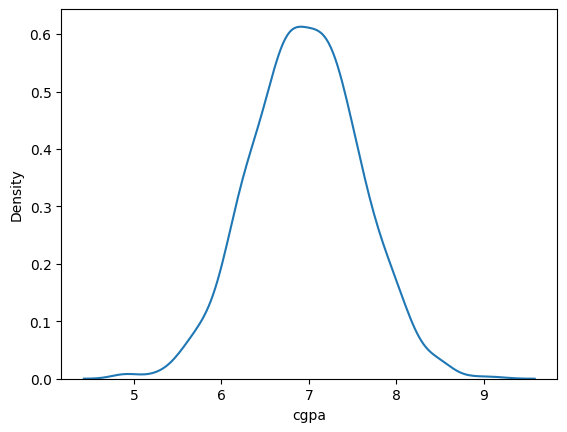

In [19]:
sns.kdeplot(placed['cgpa'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

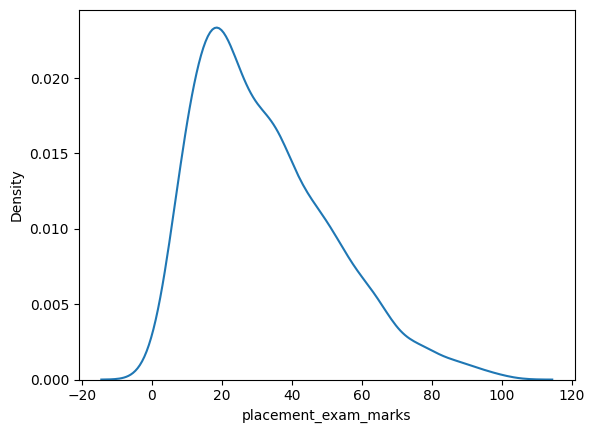

In [20]:
sns.kdeplot(placed['placement_exam_marks'])

In [ ]:
# detecting outliers
upper_limit = placed['cgpa'].mean() + 3 * placed['cgpa'].std()
lower_limit = placed['cgpa'].mean() - 3 * placed['cgpa'].std()

In [33]:
print(lower_limit)
print(upper_limit)

5.113546374602832
8.808933625397168


In [32]:
placed[(placed['cgpa'] < lower_limit) | (placed['cgpa'] > upper_limit)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [37]:
#removing outliers using trimming
cgpa_without_outliers = placed[(placed['cgpa'] > lower_limit) & (placed['cgpa'] <upper_limit)]

In [38]:
cgpa_without_outliers

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [55]:
## capping to remove outliers
placed['cgpa']= np.where(placed['cgpa']< lower_limit, 
         lower_limit,
         np.where(placed['cgpa']>upper_limit,
                  upper_limit , placed['cgpa']
                  )

            )

In [56]:
placed[placed['cgpa'] < lower_limit]

,cgpa,placement_exam_marks,placed


In [3]:
##using z score
pl = pd.read_csv('/home/ann/Documents/machinelearning/FeatureEngineering/day42-outlier-removal-using-zscore/placement.csv')

In [8]:
pl['cgpa_z_score'] = (pl['cgpa'] - pl['cgpa'].mean())/pl['cgpa'].std()

In [15]:
pl.drop(labels=['z_score'], axis=1)

,cgpa,placement_exam_marks,placed,cgpa_z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [20]:
pl[(pl['cgpa_z_score'] > -3) & (pl['cgpa_z_score'] < 3)]

,cgpa,placement_exam_marks,placed,z_score,cgpa_z_score
0,7.19,26.0,1,0.371425,0.371425
1,7.46,38.0,1,0.809810,0.809810
2,7.54,40.0,1,0.939701,0.939701
3,6.42,8.0,1,-0.878782,-0.878782
4,7.23,17.0,0,0.436371,0.436371
...,...,...,...,...,...
991,7.04,57.0,0,0.127878,0.127878
992,6.26,12.0,0,-1.138565,-1.138565
993,6.73,21.0,1,-0.375452,-0.375452
994,6.48,63.0,0,-0.781363,-0.781363


In [21]:
## outlier detection and removal with iqr box plot
pl = pd.read_csv('/home/ann/Documents/machinelearning/FeatureEngineering/day42-outlier-removal-using-zscore/placement.csv')

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

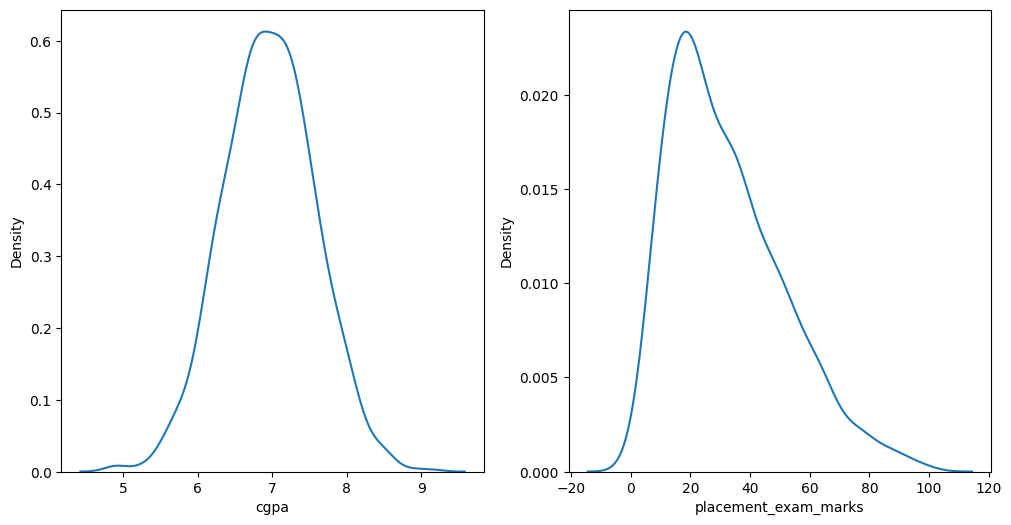

In [29]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.kdeplot(pl['cgpa'])

plt.subplot(1,2,2)
sns.kdeplot(pl['placement_exam_marks'])

<Axes: ylabel='placement_exam_marks'>

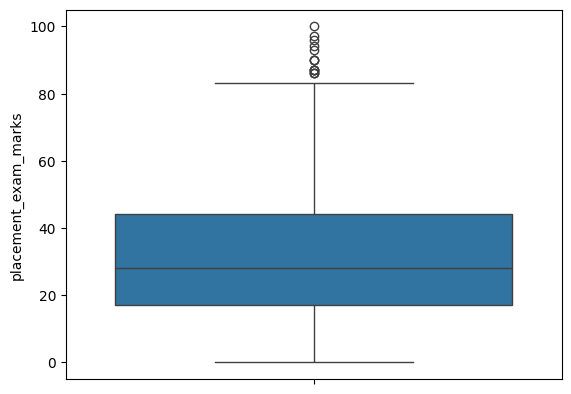

In [30]:
sns.boxplot(pl['placement_exam_marks'])

In [31]:
percentile25 = pl['placement_exam_marks'].quantile(0.25)
percentile75 = pl['placement_exam_marks'].quantile(0.75)

In [32]:
iqr = percentile75 - percentile25

In [33]:
lower_boundary = percentile25 - 1.5 * iqr
upper_boundary = percentile75 + 1.5 * iqr

In [ ]:
## removing outliers using trimming
pl[(pl['placement_exam_marks'] > lower_boundary) & (pl['placement_exam_marks'] < upper_boundary)]

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [35]:
## outliers detection using percentiles 
pl = pd.read_csv('/home/ann/Documents/machinelearning/FeatureEngineering/day42-outlier-removal-using-zscore/placement.csv')

In [43]:
wh = pd.read_csv('/home/ann/Documents/machinelearning/FeatureEngineering/day44-outlier-detection-using-percentiles/weight-height.csv')

In [44]:
wh.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: xlabel='Weight', ylabel='Density'>

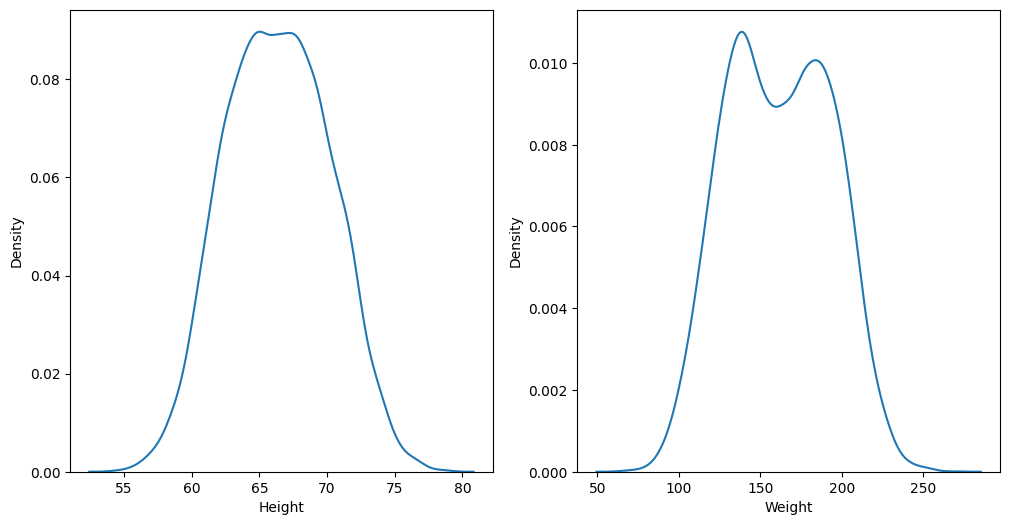

In [48]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.kdeplot(wh['Height'])

plt.subplot(1,2,2)
sns.kdeplot(wh['Weight'])



<Axes: ylabel='Height'>

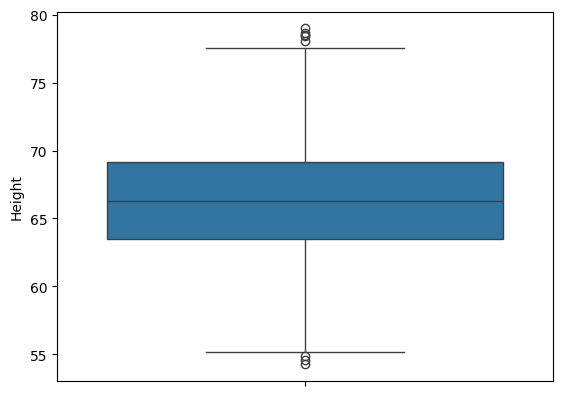

In [50]:
sns.boxplot(wh['Height'])

In [51]:
percentile1 = wh['Height'].quantile(0.01)
percentile99 = wh['Height'].quantile(0.99)

In [59]:
new_height = np.where(wh['Height'] <= percentile1, 
         percentile1,
         np.where(wh['Height'] >= percentile99,
                  percentile99,
                  wh['Height'])
                  )

In [60]:
wh.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: ylabel='Density'>

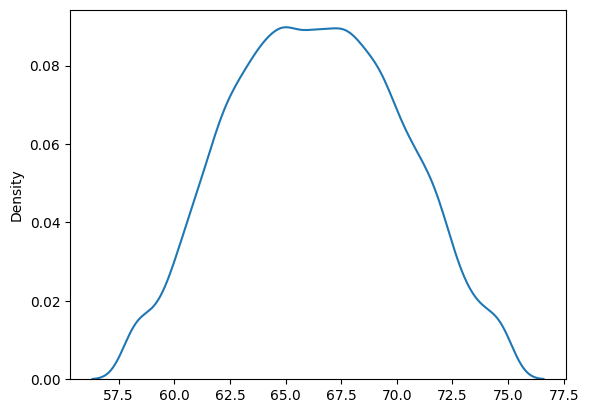

In [61]:
sns.kdeplot(new_height)

<Axes: ylabel='Count'>

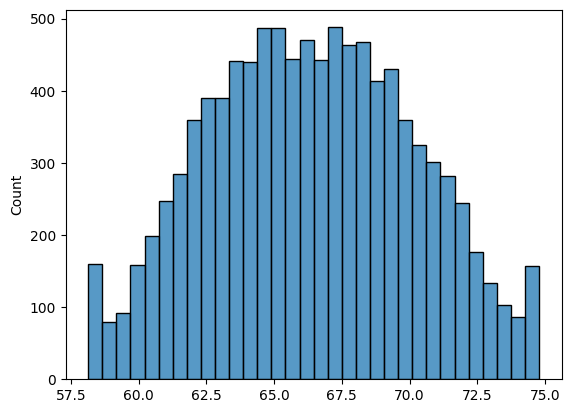

In [62]:
sns.histplot(new_height)

## Algorithms

In [23]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('/home/ann/Documents/machinelearning/Algorithms/Algorithms1/SimpleLinearRegression/placement.csv')


In [5]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [6]:
df.isna().sum()

cgpa       0
package    0
dtype: int64

In [18]:
x = df.iloc[:, 0:1]

In [21]:
y = df.iloc[:, -1]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [25]:
model = LinearRegression()

In [26]:
model.fit(x_train, y_train)

LinearRegression()

In [36]:
model.predict(x_test)

array([2.9383335 , 4.36894346, 3.18258398, 1.89736121, 3.49662031,
       3.35123312, 2.76968435, 2.94996447, 3.07208971, 3.94441286,
       3.57222165, 2.94996447, 2.75805338, 2.64755911, 3.67108494,
       3.2174769 , 3.97930579, 2.90925606, 2.19395108, 3.31052471,
       4.29915761, 2.8918096 , 1.87409926, 2.30444534, 3.62456104,
       2.12998071, 3.9269664 , 2.36841571, 1.5716939 , 2.06601035,
       2.31026083, 3.6885314 , 3.5024358 , 3.03719679, 2.57195777,
       2.39167766, 3.170953  , 3.82228762, 3.15932203, 2.94414898])

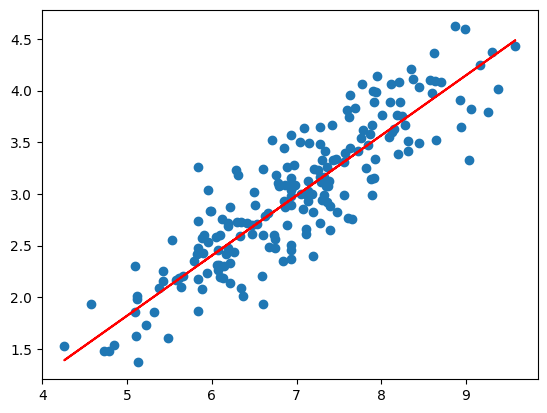

In [52]:
plt.scatter(x,y)
plt.plot(x_train, model.predict(x_train), color='red')

In [1]:
import numpy as np

In [9]:
x = np.random.random(size = (25,5))
y = np.random.randint(1,10,(25,5))

In [10]:
x

array([[0.33460229, 0.76517231, 0.25743578, 0.99216979, 0.98225726],
       [0.48600793, 0.23658206, 0.45942156, 0.12669885, 0.23233781],
       [0.48514028, 0.53107501, 0.05635521, 0.56549338, 0.32177034],
       [0.56447942, 0.75827147, 0.0606284 , 0.53450366, 0.25345487],
       [0.22212471, 0.78170546, 0.25136391, 0.67933251, 0.81083465],
       [0.41374458, 0.90779232, 0.94418017, 0.37366023, 0.2908148 ],
       [0.26847701, 0.02781036, 0.5720298 , 0.05495236, 0.98729343],
       [0.41215724, 0.52043579, 0.01898391, 0.75178492, 0.71520658],
       [0.37235508, 0.66303265, 0.03475805, 0.14096969, 0.94538689],
       [0.99265792, 0.52322907, 0.8057166 , 0.5730082 , 0.27447437],
       [0.03821449, 0.4370151 , 0.99716254, 0.03299457, 0.46783517],
       [0.01059826, 0.0728606 , 0.17036198, 0.92790487, 0.28944355],
       [0.16242363, 0.02898537, 0.42049056, 0.82594505, 0.75203058],
       [0.72679807, 0.15896252, 0.40950723, 0.3469259 , 0.7974724 ],
       [0.65369821, 0.26561534, 0.

In [11]:
y

array([[6, 8, 6, 3, 6],
       [6, 1, 1, 5, 3],
       [8, 8, 7, 8, 5],
       [1, 5, 5, 7, 1],
       [6, 7, 6, 2, 6],
       [3, 1, 6, 2, 2],
       [5, 2, 2, 3, 1],
       [9, 7, 1, 4, 4],
       [4, 8, 5, 6, 8],
       [6, 8, 8, 3, 9],
       [8, 3, 6, 4, 6],
       [1, 2, 6, 1, 8],
       [2, 3, 4, 6, 3],
       [3, 7, 8, 4, 2],
       [5, 3, 4, 6, 1],
       [4, 5, 8, 6, 5],
       [9, 8, 2, 2, 3],
       [3, 9, 4, 8, 9],
       [7, 9, 6, 6, 8],
       [2, 4, 3, 1, 4],
       [9, 3, 8, 6, 8],
       [1, 8, 6, 3, 2],
       [8, 2, 7, 2, 3],
       [3, 6, 2, 6, 4],
       [8, 1, 1, 7, 4]])

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score 

In [26]:
data = pd.read_csv('/home/ann/Documents/machinelearning/Algorithms/Algorithms1/SimpleLinearRegression/salary_data.csv')

In [27]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [28]:
x = data.iloc[:, :-1]

In [29]:
y = data.iloc[:, -1]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(x_train, y_train)

LinearRegression()

In [33]:
y_pred = lr.predict(x_test)

In [36]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'salary')

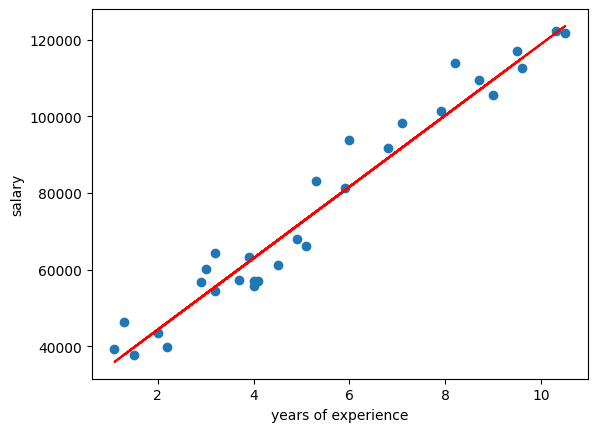

In [48]:
plt.scatter(x, y)
plt.plot(x_train,lr.predict(x_train), color = 'red')
plt.xlabel('years of experience')
plt.ylabel('salary')

In [9]:
from sklearn import datasets

# List of all dataset loaders
dataset_loaders = [func for func in dir(datasets) if 'load_' in func]

print("Available datasets in scikit-learn:")
for loader in dataset_loaders:
    print(loader)


Available datasets in scikit-learn:
load_breast_cancer
load_diabetes
load_digits
load_files
load_iris
load_linnerud
load_sample_image
load_sample_images
load_svmlight_file
load_svmlight_files
load_wine


In [10]:
from sklearn.datasets import load_iris

In [21]:
iris= load_iris()

In [23]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [29]:
df  = pd.DataFrame(data = iris['data'], columns=iris['feature_names'])
df['target'] = iris.target

In [33]:
df['target'].unique()

array([0, 1, 2])

In [32]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [35]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [27]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)